In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# New Section

In [ ]:
# Load the dataset (replace 'path_to_dataset.csv' with your actual dataset path)
df = pd.read_csv('/content/5g-South Asia.csv')

In [ ]:
columns_to_keep = ['T-R Separation Distance (m)', 'Time Delay (ns)', 'Frequency','Path Loss (dB)']
df1 = df[columns_to_keep]

In [ ]:
df

,Seasonal Variation (Data Source),Simulation Run Number,T-R Separation Distance (m),Time Delay (ns),Received Power (dBm),Phase (rad),Azimuth AoD (degree),Elevation AoD (degree),Azimuth AoA (degree),Elevation AoA (degree),Path Loss (dB),RMS Delay Spread (ns),Season,Frequency
0,FallL,1,216.4,721,-120.8,3.2,291,-2.1,14.3,-17,150.8,3.5,0,24.250
1,FallL,1,216.4,725,-127.8,5.6,299,1.4,176.9,18,157.7,1.5,0,24.250
2,FallL,1,216.4,729,-119.8,1.4,119,-4.4,212.3,5,149.8,0.4,0,24.250
3,FallL,1,216.4,735,-118.1,2.8,290,-1.2,315.4,-8,148.1,0.8,0,24.250
4,FallL,1,216.4,741,-126.1,3.1,295,-1.4,207.3,12,156.0,5.0,0,24.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,winterH,3,91.7,790,-145.0,0.8,18,-9.2,248.1,-5,152.5,71.0,3,7.125
2831,winterH,3,91.7,796,-147.7,2.9,27,-9.5,15.8,-5,160.5,83.6,3,7.125
2832,winterH,3,91.7,802,-158.5,0.3,34,-8.5,20.4,-6,164.8,75.6,3,7.125
2833,winterH,3,91.7,833,-156.0,2.8,5,-7.4,15.3,6,142.2,24.2,3,7.125


In [ ]:
df.head()

,Seasonal Variation (Data Source),Simulation Run Number,T-R Separation Distance (m),Time Delay (ns),Received Power (dBm),Phase (rad),Azimuth AoD (degree),Elevation AoD (degree),Azimuth AoA (degree),Elevation AoA (degree),Path Loss (dB),RMS Delay Spread (ns),Season,Frequency
0,FallL,1,216.4,721,-120.8,3.2,291,-2.1,14.3,-17,150.8,3.5,0,24.25
1,FallL,1,216.4,725,-127.8,5.6,299,1.4,176.9,18,157.7,1.5,0,24.25
2,FallL,1,216.4,729,-119.8,1.4,119,-4.4,212.3,5,149.8,0.4,0,24.25
3,FallL,1,216.4,735,-118.1,2.8,290,-1.2,315.4,-8,148.1,0.8,0,24.25
4,FallL,1,216.4,741,-126.1,3.1,295,-1.4,207.3,12,156.0,5.0,0,24.25


In [ ]:
df['Seasonal Variation (Data Source)'].unique()

array(['FallL', 'FallH', 'FallM', 'SpringL', 'SpringH', 'SpringM',
       'SummerL', 'SummerH', 'SummerM', 'WinterL', 'WinterH', 'WinterM',
       'winterL', 'winterM', 'winterH'], dtype=object)

In [ ]:
df.info

<bound method DataFrame.info of      Seasonal Variation (Data Source)  Simulation Run Number  \
0                               FallL                      1   
1                               FallL                      1   
2                               FallL                      1   
3                               FallL                      1   
4                               FallL                      1   
...                               ...                    ...   
2830                          winterH                      3   
2831                          winterH                      3   
2832                          winterH                      3   
2833                          winterH                      3   
2834                          winterH                      3   

      T-R Separation Distance (m)  Time Delay (ns)  Received Power (dBm)  \
0                           216.4              721                -120.8   
1                           216.4              725                -127.8   
2                           216.4              729                -119.8   
3                           216.4              735                -118.1   
4                           216.4              741                -126.1   
...                           ...              ...                   ...   
2830                         91.7              790                -145.0   
2831                         91.7              796                -147.7   
2832                         91.7              802                -158.5   
2833                         91.7              833                -156.0   
2834                         91.7              847                -152.7   

       Phase (rad)  Azimuth AoD (degree)  Elevation AoD (degree)  \
0              3.2                   291                    -2.1   
1              5.6                   299                     1.4   
2              1.4                   119                    -4.4   
3              2.8                   290                    -1.2   
4              3.1                   295                    -1.4   
...            ...                   ...                     ...   
2830           0.8                    18                    -9.2   
2831           2.9                    27                    -9.5   
2832           0.3                    34                    -8.5   
2833           2.8                     5                    -7.4   
2834           6.1                    17                   -11.5   

      Azimuth AoA (degree)  Elevation AoA (degree)  Path Loss (dB)  \
0                     14.3                     -17           150.8   
1                    176.9                      18           157.7   
2                    212.3                       5           149.8   
3                    315.4                      -8           148.1   
4                    207.3                      12           156.0   
...                    ...                     ...             ...   
2830                 248.1                      -5           152.5   
2831                  15.8                      -5           160.5   
2832                  20.4                      -6           164.8   
2833                  15.3                       6           142.2   
2834                   4.3                       4           151.1   

      RMS Delay Spread (ns)  Season  Frequency  
0                       3.5       0     24.250  
1                       1.5       0     24.250  
2                       0.4       0     24.250  
3                       0.8       0     24.250  
4                       5.0       0     24.250  
...                     ...     ...        ...  
2830                   71.0       3      7.125  
2831                   83.6       3      7.125  
2832                   75.6       3      7.125  
2833                   24.2       3      7.125  
2834                   58.2       3      7.125  

[2835 rows x 14 columns]>

In [ ]:
df.describe()

,Simulation Run Number,T-R Separation Distance (m),Time Delay (ns),Received Power (dBm),Phase (rad),Azimuth AoD (degree),Elevation AoD (degree),Azimuth AoA (degree),Elevation AoA (degree),Path Loss (dB),RMS Delay Spread (ns),Season,Frequency
count,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000
mean,2.004586,243.498589,952.639859,-139.425785,3.095838,164.574250,-5.261481,179.843880,3.411640,163.146702,35.497143,1.469841,26.752681
std,0.839006,135.357398,441.225803,15.154033,1.802788,105.423395,5.382295,103.739323,7.924988,15.794735,35.927540,1.098239,22.409547
min,1.000000,10.000000,33.000000,-160.000000,0.000000,0.000000,-21.400000,0.100000,-31.000000,98.800000,0.000000,0.000000,7.125000
25%,1.000000,109.500000,585.500000,-151.300000,1.600000,63.000000,-9.000000,87.350000,-2.000000,154.400000,7.500000,0.000000,7.125000
50%,2.000000,239.500000,935.000000,-141.700000,3.000000,170.000000,-5.400000,176.100000,3.000000,164.900000,23.300000,2.000000,24.250000
75%,3.000000,376.400000,1347.000000,-130.500000,4.700000,257.000000,-1.600000,270.350000,8.000000,174.750000,52.050000,2.000000,52.600000
max,3.000000,487.800000,1927.000000,-68.900000,6.300000,360.000000,13.100000,359.900000,40.000000,189.900000,227.600000,3.000000,71.000000


In [ ]:
df.isnull().sum()

,0
Seasonal Variation (Data Source),0
Simulation Run Number,0
T-R Separation Distance (m),0
Time Delay (ns),0
Received Power (dBm),0
Phase (rad),0
Azimuth AoD (degree),0
Elevation AoD (degree),0
Azimuth AoA (degree),0
Elevation AoA (degree),0


In [ ]:
df.shape

(2835, 14)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
# Encoding the 'Season' column if it's categorical
label_encoder = LabelEncoder()
df['Seasonal Variation (Data Source)'] = label_encoder.fit_transform(df['Seasonal Variation (Data Source)'])

In [ ]:

df['Seasonal Variation (Data Source)']

,Seasonal Variation (Data Source)
0,1
1,1
2,1
3,1
4,1
...,...
2830,12
2831,12
2832,12
2833,12


In [ ]:
import seaborn as sns

In [ ]:
df

,Seasonal Variation (Data Source),Simulation Run Number,T-R Separation Distance (m),Time Delay (ns),Received Power (dBm),Phase (rad),Azimuth AoD (degree),Elevation AoD (degree),Azimuth AoA (degree),Elevation AoA (degree),Path Loss (dB),RMS Delay Spread (ns),Season,Frequency
0,1,1,216.4,721,-120.8,3.2,291,-2.1,14.3,-17,150.8,3.5,0,24.250
1,1,1,216.4,725,-127.8,5.6,299,1.4,176.9,18,157.7,1.5,0,24.250
2,1,1,216.4,729,-119.8,1.4,119,-4.4,212.3,5,149.8,0.4,0,24.250
3,1,1,216.4,735,-118.1,2.8,290,-1.2,315.4,-8,148.1,0.8,0,24.250
4,1,1,216.4,741,-126.1,3.1,295,-1.4,207.3,12,156.0,5.0,0,24.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,12,3,91.7,790,-145.0,0.8,18,-9.2,248.1,-5,152.5,71.0,3,7.125
2831,12,3,91.7,796,-147.7,2.9,27,-9.5,15.8,-5,160.5,83.6,3,7.125
2832,12,3,91.7,802,-158.5,0.3,34,-8.5,20.4,-6,164.8,75.6,3,7.125
2833,12,3,91.7,833,-156.0,2.8,5,-7.4,15.3,6,142.2,24.2,3,7.125


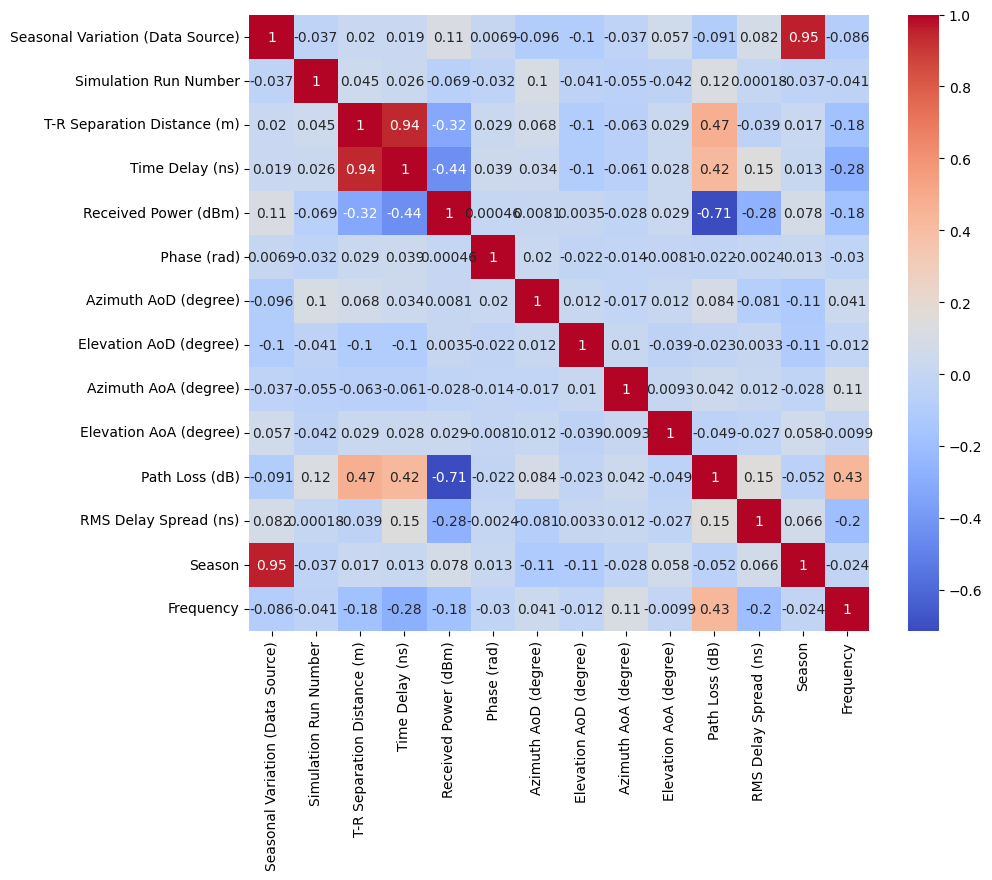

In [ ]:
# Visualizing correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
x = df.drop(columns=['Path Loss (dB)'])  # All columns except 'Path Loss' as features
Y = df['Path Loss (dB)']

In [ ]:
X

,T-R Separation Distance (m),Time Delay (ns),Frequency
0,216.4,721,24.250
1,216.4,725,24.250
2,216.4,729,24.250
3,216.4,735,24.250
4,216.4,741,24.250
...,...,...,...
2830,91.7,790,7.125
2831,91.7,796,7.125
2832,91.7,802,7.125
2833,91.7,833,7.125


In [ ]:
a= df.drop(columns=['Path Loss (dB)'])  # All columns except 'Path Loss' as features
b = df['Path Loss (dB)']

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(a)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
X_train

array([[-0.97792363, -1.19756334,  0.31404939, ..., -0.89075921,
        -1.33859762,  1.15361005],
       [-0.97792363, -1.19756334, -1.07363339, ...,  1.84300221,
        -1.33859762,  1.9748335 ],
       [ 0.832421  ,  1.18663053, -0.90146614, ...,  0.87421507,
         1.39352927,  1.9748335 ],
       ...,
       [ 1.34966232,  1.18663053,  1.48818568, ..., -0.81281082,
         1.39352927,  1.15361005],
       [ 0.31517968, -1.19756334, -1.41796788, ...,  0.25897955,
         0.48282031,  1.9748335 ],
       [-0.46068231,  1.18663053,  1.10838325, ..., -0.75991727,
        -0.42788866,  1.15361005]])

In [ ]:

X_test

array([[-0.71930297, -1.19756334, -1.5258495 , ..., -0.54277533,
        -0.42788866, -0.87601695],
       [ 1.86690365, -1.19756334, -0.32954576, ...,  0.71831828,
         1.39352927, -0.87601695],
       [ 0.31517968, -0.00546641, -0.29777241, ..., -0.73486243,
         0.48282031,  1.15361005],
       ...,
       [ 0.57380034, -1.19756334,  0.68572375, ..., -0.53442371,
         0.48282031, -0.11169892],
       [-0.97792363, -0.00546641, -0.51427457, ..., -0.7961076 ,
        -1.33859762,  1.9748335 ],
       [-1.23654429, -0.00546641,  0.86454123, ..., -0.94922051,
        -1.33859762, -0.87601695]])

In [ ]:
y_train

,Path Loss (dB)
1025,188.8
1565,171.9
1393,171.3
1477,186.6
1064,182.0
...,...
1638,170.8
1095,169.4
1130,172.3
1294,164.8


In [ ]:
y_test

,Path Loss (dB)
2090,130.4
2559,165.2
1146,184.5
1110,175.8
196,162.0
...,...
18,165.5
613,179.9
643,158.9
1593,182.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf:.4f}, R-squared: {r2_rf:.4f}')


Random Forest - MSE: 23.7891, R-squared: 0.8962


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_nn = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluation
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f'Neural Network - MSE: {mse_nn:.4f}, R-squared: {r2_nn:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network - MSE: 115.8714, R-squared: 0.4944


In [ ]:
from xgboost import XGBRegressor

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {mse_xgb:.4f}, R-squared: {r2_xgb:.4f}')


XGBoost - MSE: 20.8836, R-squared: 0.9089


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'LightGBM - MSE: {mse_lgb:.4f}, R-squared: {r2_lgb:.4f}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1724
[LightGBM] [Info] Number of data points in the train set: 1984, number of used features: 13
[LightGBM] [Info] Start training from score 162.850202
LightGBM - MSE: 19.9670, R-squared: 0.9129


In [ ]:
# Display results for all models
print(f'Random Forest - MSE: {mse_rf:.4f}, R-squared: {r2_rf:.4f}')
print(f'Neural Network - MSE: {mse_nn:.4f}, R-squared: {r2_nn:.4f}')
print(f'XGBoost - MSE: {mse_xgb:.4f}, R-squared: {r2_xgb:.4f}')
print(f'LightGBM - MSE: {mse_lgb:.4f}, R-squared: {r2_lgb:.4f}')


Random Forest - MSE: 23.7891, R-squared: 0.8962
Neural Network - MSE: 115.8714, R-squared: 0.4944
XGBoost - MSE: 20.8836, R-squared: 0.9089
LightGBM - MSE: 19.9670, R-squared: 0.9129


In [ ]:
import joblib

# Save the LightGBM model
joblib.dump(lgb_model, 'lightgbm_model.pkl')


['lightgbm_model.pkl']

In [ ]:
from google.colab import files

# Download the saved model
files.download('lightgbm_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

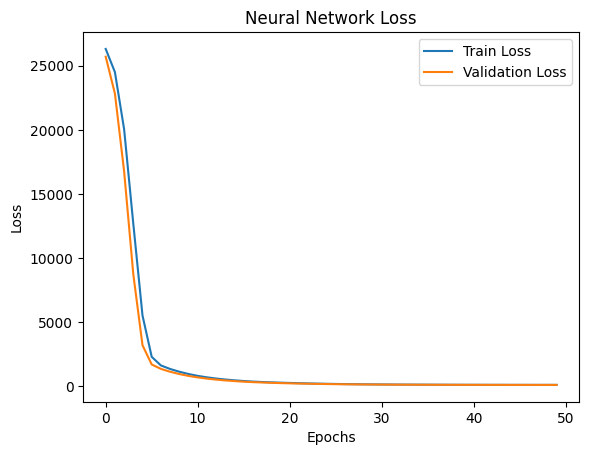

In [ ]:
plt.plot(history_nn.history['loss'], label='Train Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Loss')
plt.legend()
plt.show()


In [ ]:
import pickle

# Save the model as a pickle file
with open('xgboostmodel.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)


In [ ]:
from google.colab import files

# Download the pickle file
files.download('xgboostmodel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nn_model.save('neural_network_model.h5')  # Save the model in .h5 format


In [ ]:
from google.colab import files

# Download the saved model
files.download('neural_network_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>